In [36]:
import pandas as pd

adir = "/mnt/lab_data2/anusri/chrombpnet/logs/checkpoint/JAN_02_2023/model_dir_atac.csv"

meta = pd.read_csv(adir, sep=",", header=None)
meta = meta[meta[0]=="fold_0"].reset_index()
meta

,index,0,1,2
0,0,fold_0,GM12878,/mnt/lab_data2/anusri/chrombpnet/results/chrom...
1,5,fold_0,K562,/mnt/lab_data2/anusri/chrombpnet/results/chrom...
2,10,fold_0,HEPG2,/mnt/lab_data2/anusri/chrombpnet/results/chrom...
3,15,fold_0,IMR90,/mnt/lab_data2/anusri/chrombpnet/results/chrom...
4,20,fold_0,H1ESC,/mnt/lab_data2/anusri/chrombpnet/results/chrom...


In [68]:
import deepdish
import os

def get_footprints(celltype, items_to_filter):
    print(celltype)
    if celltype=="IMR90":
    #fpath="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/modisco_jun_30/modisco/ATAC/"
        fpath="/mnt/lab_data2/anusri/chrombpnet/logs/checkpoint/JAN_20_2024/marginal_footprints/output/ATAC/"
    else:
        fpath="/mnt/lab_data2/anusri/chrombpnet/logs/checkpoint/JAN_20_2024/marginal_footprints/output/ATAC/"
    ffile = os.path.join(fpath,celltype+"/footprints.h5")
    corrected = deepdish.io.load(ffile)

    ffile = os.path.join(fpath,celltype+"/uncorrected_footprints.h5")
    uncorrected = deepdish.io.load(ffile)
    
    #return [corrected[key][0]/sum(corrected[key][0]) for key in items_to_filter], [uncorrected[key][0]/sum(uncorrected[key][0]) for key in items_to_filter]
    return [(corrected[key][0]/sum(corrected[key][0])) for key in items_to_filter], [(uncorrected[key][0]/sum(uncorrected[key][0])) for key in items_to_filter]
    
    


In [69]:
#items_to_filter=["HEPG2_COUNTS_metacluster_0_pattern_1", "GM12878_COUNTS_metacluster_0_pattern_9",  "K562_COUNTS_metacluster_0_pattern_0",  "H1ESC_COUNTS_metacluster_0_pattern_1",   "IMR90_COUNTS_metacluster_0_pattern_3", "K562_COUNTS_metacluster_0_pattern_2", "GM12878_COUNTS_metacluster_0_pattern_1"]

items_to_filter=["HNF4G", "NFKB",  "GATA.TAL",  "PO5F1",   "FOXI1", "SP1", "CTCF"]

corrected = []
uncorrected = []
for i in [2,0,1,4,3]:
    #if meta.iloc[i,2]=="IMR90":
    #    continue
    x, y = get_footprints(meta.iloc[i,2], items_to_filter)
    corrected.append(x)
    uncorrected.append(y)

HEPG2
GM12878
K562
H1ESC
IMR90


In [70]:
import numpy as np

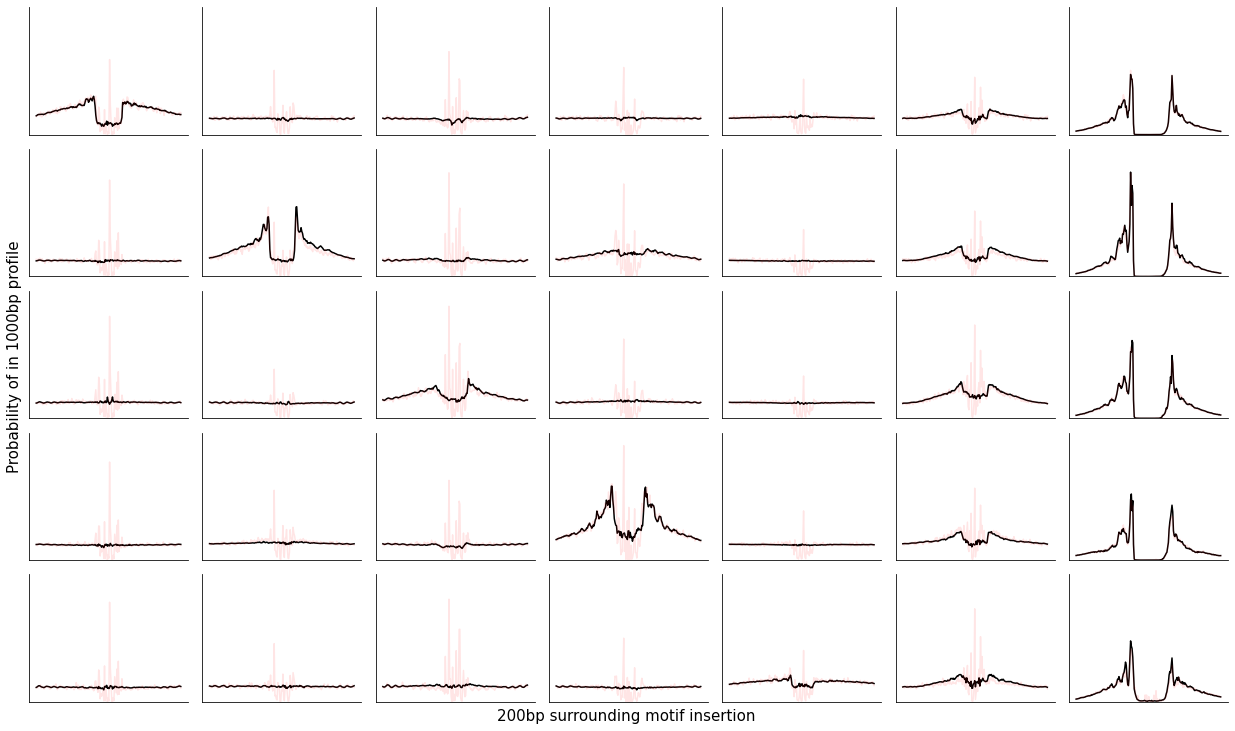

In [71]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig,axs = plt.subplots(5,7,figsize=(17,10),sharey=False,sharex='col')

for i in range(5):
    for j in range(7):
        axs[i,j].plot(corrected[i][j][400:600], c='black')
        axs[i,j].plot(uncorrected[i][j][400:600], c='red', alpha=0.1)
        if j != 6:
            axs[i,j].set_ylim((0,0.008))
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
        else:
            axs[i,j].set_ylim((0,0.03))
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
        axs[i,j].spines[['right', 'top']].set_visible(False)

# Set common labels
fig.text(0.5, 0, '200bp surrounding motif insertion', ha='center', va='center', fontsize=15)
fig.text(0, 0.5, 'Probability of in 1000bp profile', ha='center', va='center', rotation='vertical', fontsize=15)

fig.tight_layout()
        

plt.savefig("subfigs/atac_plot_marginal_footprints.pdf", dpi=300, transparent=True)
